In [20]:
import time
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
path_data = Path().resolve().parent / "testdata" / "CarPrice.csv"
df = pd.read_csv(path_data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


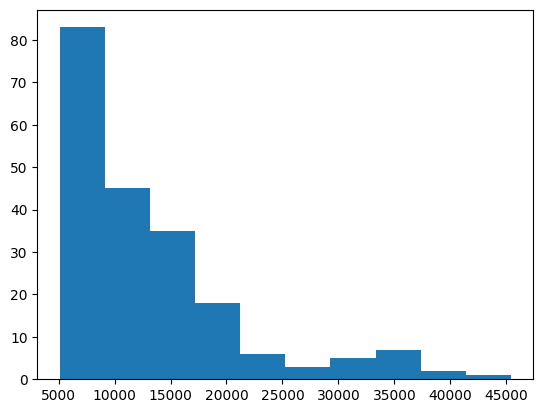

In [22]:
plt.hist(df["price"])
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
 14  gas               205 non-null    bool   
 15  hardtop           205 non-null    bool   
 16  hatchback         205 non-null    bool   
 1

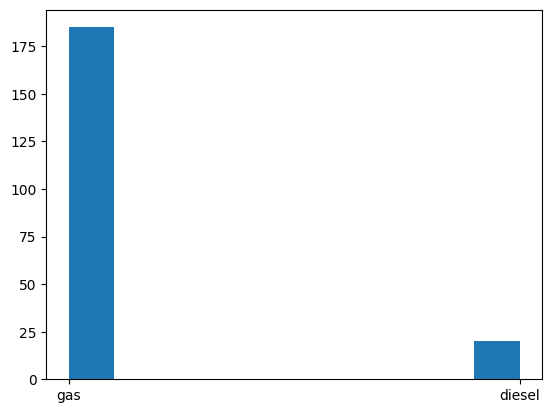

In [23]:
df.drop(["car_ID","symboling","CarName","aspiration","doornumber","fuelsystem","enginelocation","enginetype"],axis=1,inplace=True)
plt.hist(df["fueltype"])
plt.show()

In [24]:
dummy1 = pd.get_dummies(df['fueltype'],drop_first=True)
dummy2 = pd.get_dummies(df['carbody'],drop_first=True)
dummy3 = pd.get_dummies(df['drivewheel'],drop_first=True)
dummy4 = pd.get_dummies(df['cylindernumber'],drop_first=True)
df.drop(['fueltype','carbody',"drivewheel","cylindernumber"],axis=1,inplace=True)

In [25]:
df = pd.concat([df,dummy1,dummy2,dummy3,dummy4],axis=1)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,True,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,True,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,False,True,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,True,False,True,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,True,False,False,False,True,False,False,False,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
 14  gas               205 non-null    bool   
 15  hardtop           205 non-null    bool   
 16  hatchback         205 non-null    bool   
 1

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"],axis=1), 
                                                    df['price'], test_size=0.30, 
                                                    random_state=111)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [52]:
print("Starting")
linreg = LinearRegression()
linreg.fit(X_train,y_train)
predictions = linreg.predict(X_test)
score = linreg.score(X_test, y_test)
intercept = linreg.intercept_
coef = linreg.coef_

print("Coef",coef)
print("Intercept",intercept)
print("Score",score)
print(linreg.summary())

Starting
Coef [ 1.82096021e+02 -1.07598890e+01  4.33794454e+02  6.88667266e+01
 -5.60460996e-01  1.46820790e+02 -4.28673960e+03 -3.25768863e+03
 -5.06183292e+02  4.43127911e+01  1.38012884e+00 -8.91080366e+01
  1.82547022e+02 -7.87738242e+03 -1.41251368e+03 -4.84238732e+03
 -3.10011254e+03 -4.26983029e+03 -1.58297678e+03  4.34084991e+01
  2.74271683e+03  3.47805884e+02 -7.78355568e+02  0.00000000e+00
  0.00000000e+00  9.19142369e+03]
Intercept -26065.09856248912
Score 0.8361464439700927


AttributeError: 'LinearRegression' object has no attribute 'summary'